In [10]:
#1. 搭建的神经网络，使用olivettiface数据集进行训练。

import torch
import torch.nn as nn
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from sklearn.datasets import fetch_olivetti_faces  # 获取olivetti人脸数据集
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader


In [11]:
#定义超参数
learning_rate = 0.001
epochs = 300
batch_size = 64

#GPU是否可用(经测试，GPU比CPU快10倍)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#定义模型
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4096, 400) #定义三个全连接层
        self.fc2 = nn.Linear(400, 400) 
        self.fc3 = nn.Linear(400, 40) 
        self.act = nn.ReLU()

    def forward(self, input_tensor):
        out = self.act(self.fc1(input_tensor))
        out = self.act(self.fc2(out))
        result = self.fc3(out)
        return result

cuda:0


In [12]:
# 引入数据
olivetti_faces = fetch_olivetti_faces(data_home='./', shuffle=True)
images = torch.tensor(olivetti_faces.data,dtype=torch.float32)
print(images.shape)
targets = torch.tensor(olivetti_faces.target,dtype=torch.long)
print(targets.shape)
dataset = [(img,lbl) for img,lbl in zip(images, targets)]
train_dl = DataLoader(dataset, batch_size = batch_size, shuffle=True)
print(dataset)



torch.Size([400, 4096])
torch.Size([400])
[(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13)), (tensor([0.7686, 0.7562, 0.7438,  ..., 0.4835, 0.6281, 0.6529]), tensor(30)), (tensor([0.3719, 0.3471, 0.3678,  ..., 0.7066, 0.6818, 0.5496]), tensor(34)), (tensor([0.2810, 0.3595, 0.4050,  ..., 0.5372, 0.2603, 0.1446]), tensor(19)), (tensor([0.3760, 0.4752, 0.5744,  ..., 0.3802, 0.3636, 0.4174]), tensor(24)), (tensor([0.2066, 0.2810, 0.3678,  ..., 0.2521, 0.2438, 0.2727]), tensor(6)), (tensor([0.4339, 0.5702, 0.6405,  ..., 0.2231, 0.2231, 0.2273]), tensor(15)), (tensor([0.3884, 0.4628, 0.5537,  ..., 0.1570, 0.1529, 0.1818]), tensor(26)), (tensor([0.5537, 0.5744, 0.5868,  ..., 0.4132, 0.3636, 0.3554]), tensor(14)), (tensor([0.1529, 0.1736, 0.2686,  ..., 0.3388, 0.2149, 0.1529]), tensor(21)), (tensor([0.1033, 0.2190, 0.1777,  ..., 0.4380, 0.4752, 0.2769]), tensor(3)), (tensor([0.4421, 0.6281, 0.5909,  ..., 0.1198, 0.0785, 0.0868]), tensor(13)), (tensor([0.6116, 0.6612

In [13]:
model1 = MyModel().to(device)
# input_data = torch.randn((64, 4096))
# output = model1(input_data)
# print(output.shape)

# 引入损失函数 + 优化器
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)

losses = []
#开始训练
for epoch in range(epochs):
    for data, target in train_dl:
        data = data.reshape(-1, 4096).to(device) #每个样本是一个长度为4096的向量，转换目的是为了匹配模型的输入层
        # print(data.shape)
        target = target.to(device)
        #前向计算
        outputs = model1(data)
        loss = loss_func(outputs, target)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # print(f"epoch: {epoch+1}/{epochs}, loss = {loss.item():.4f}")    

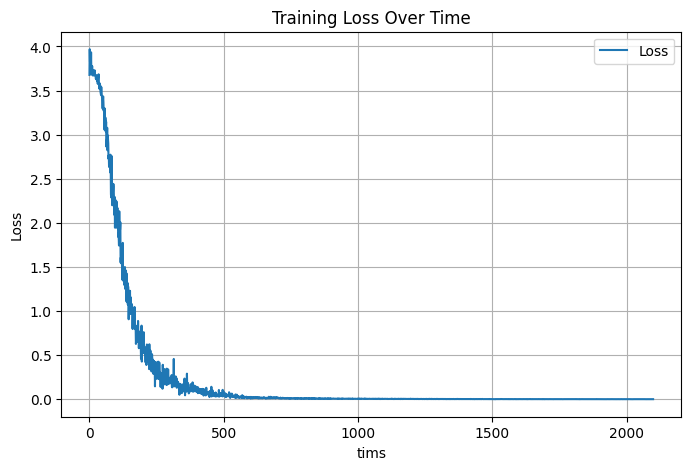

In [15]:
# 画losses 下降曲线图
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(0, 2100), losses, label='Loss')
plt.xlabel('tims')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid()
plt.show()